# Shapes Dataset

In [25]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from IPython.display import display, HTML
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from random import randint
from PIL import Image, ImageDraw

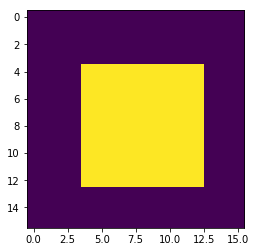

In [13]:
im = Image.fromarray(np.uint8(np.zeros((16,16))))
draw = ImageDraw.Draw(im)
draw.rectangle(((im.size[1]/4, im.size[1]/4), (im.size[1]*3/4, im.size[1]*3/4)), fill=128, outline=128)
del draw

imshow(np.asarray(im))

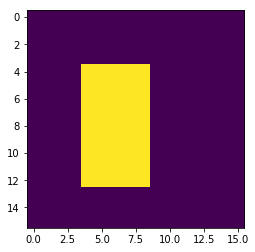

In [15]:
im = Image.fromarray(np.uint8(np.zeros((16,16))))
draw = ImageDraw.Draw(im)
draw.rectangle(((im.size[1]/4, im.size[1]/4), (im.size[1]*2/4, im.size[1]*3/4)), fill=128, outline=128)
del draw

imshow(np.asarray(im))

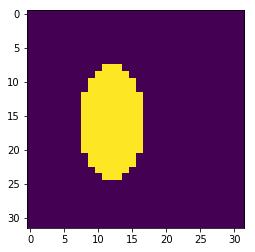

In [20]:
im = Image.fromarray(np.uint8(np.zeros((32,32))))
draw = ImageDraw.Draw(im)
draw.ellipse(((im.size[1]/4, im.size[1]/4), (im.size[1]*2/4, im.size[1]*3/4)), fill=128, outline=128)
del draw

imshow(np.asarray(im))

# Random Shapes
* Color: Random Uniform (1, 255)
* location: Random Uniform over domain, except on border
* Rectangle: Height is always twice width

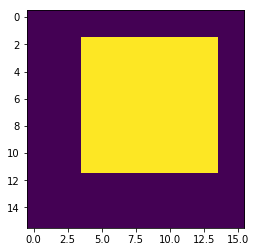

In [67]:
im = Image.fromarray(np.uint8(np.zeros((16,16))))

color = randint(1, 255)
width = randint(im.size[1]/4, im.size[1]*3/4)
top_l = (randint(1, int(im.size[1]-width-2)), (randint(1, int(im.size[1]-width-2))))
bottom_r = (top_l[0] + width, top_l[1] + width)

draw = ImageDraw.Draw(im)
draw.rectangle((top_l, bottom_r), fill=color, outline=color)
del draw

imshow(np.asarray(im))

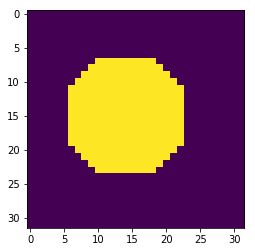

In [95]:
im = Image.fromarray(np.uint8(np.zeros((32,32))))

color = randint(1, 255)
width = randint(im.size[1]/4, im.size[1]*3/4)
top_l = (randint(1, int(im.size[1]-width-2)), (randint(1, int(im.size[1]-width-2))))
bottom_r = (top_l[0] + width, top_l[1] + width)

draw = ImageDraw.Draw(im)
draw.ellipse((top_l, bottom_r), fill=color, outline=color)
del draw

imshow(np.asarray(im))

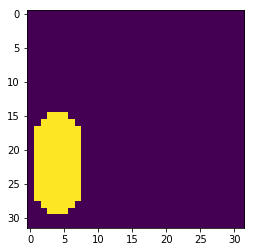

In [94]:
im = Image.fromarray(np.uint8(np.zeros((32,32))))

color = randint(1, 255)
height = randint(im.size[1]/8, im.size[1]*3/8)*2
width = int(height/2)

top_l = (randint(1, int(im.size[1]-width-2)), (randint(1, int(im.size[1]-height-2))))
bottom_r = (top_l[0] + width, top_l[1] + height)

draw = ImageDraw.Draw(im)
draw.ellipse((top_l, bottom_r), fill=color, outline=color)
del draw

imshow(np.asarray(im))

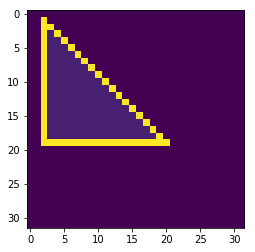

In [111]:
im = Image.fromarray(np.uint8(np.zeros((32,32))))

color = randint(1, 255)
height = randint(im.size[1]/8, im.size[1]*3/8)*2
width = height

top_l = (randint(1, int(im.size[1]-width-2)), (randint(1, int(im.size[1]-height-2))))
bottom_l = (top_l[0], top_l[1] + height)
bottom_r = (top_l[0] + width, top_l[1] + height)

draw = ImageDraw.Draw(im)
draw.polygon((top_l, bottom_l, bottom_r), fill=22, outline=color)
del draw

imshow(np.asarray(im))

# Check Images:

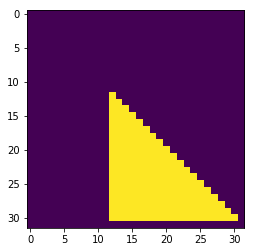

In [131]:
files_dict_loc = '/media/rene/data/hvae/shapes/sz32_rand_size_loc_fill/files_df.pkl'
with open(files_dict_loc, 'rb') as f:
    files_dict = pickle.load(f)['val']
    
sample_df = files_df.sample(n=1)
img_path = sample_df['path'].iloc[0]
im = Image.open(img_path)
imshow(np.asarray(im))

# Find out what to normalize by:
* Only possible because this is a small dataset
* This batchgen has no transforms

In [157]:
sys.path.append(str(Path.cwd().parent))
import model.model as module_arch
from data_loader.data_loaders import make_gen_single_shape
from data_loader.data_loaders import make_gen_grid

files_dict_loc = '/media/rene/data/hvae/shapes/sz32_rand_size_loc/files_dict.pkl'

data_loaders = make_gen_single_shape(files_dict_loc, batch_size=10000, num_workers=4, img_size=32, 
                                     path_colname='path', label_colname='shape_type', label=None, return_loc=False)

all_data = next(iter(data_loaders['train']))
print(all_data[0].shape, all_data[1].shape)
all_samples_mean = np.mean(all_data[0].numpy(), axis=(0, 2, 3))
all_samples_std = np.std(all_data[0].numpy(), axis=(0, 2, 3))
print(all_samples_mean, all_samples_std)

torch.Size([10000, 1, 32, 32]) torch.Size([10000])
[0.7995675] [0.39934143]


In [159]:
files_dict_loc = '/media/rene/data/hvae/shapes/sz32_rand_size_loc_g8/files_dict.pkl'

data_loaders = make_gen_grid(files_dict_loc, batch_size=10000, num_workers=4, img_size=32, 
                                     path_colname='path', return_loc=False)

all_data = next(iter(data_loaders['train']))
print(all_data[0].shape, all_data[1].shape)
all_samples_mean = np.mean(all_data[0].numpy(), axis=(0, 2, 3))
all_samples_std = np.std(all_data[0].numpy(), axis=(0, 2, 3))
print(all_samples_mean, all_samples_std)

torch.Size([10000, 1, 32, 32]) torch.Size([10000])
[0.7964354] [0.2740195]


# Multiple Shapes per Image
* Simplest case, non-overlapping shapes, each on a portion of a grid
* Stick a bunch of the simple shapes together
* Use 8x8 grid of shapes, so full image width is 8x32 = 256

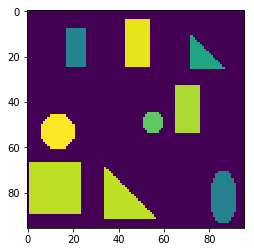

In [145]:
files_dict_loc = '/media/rene/data/hvae/shapes/sz32_rand_size_loc_fill/files_dict.pkl'
with open(files_dict_loc, 'rb') as f:
    files_dict = pickle.load(f)['val']
    
grid_width = 3
shape_img_size = 32

sample_df = files_df.sample(n=9)
grid_img = np.zeros((grid_width*shape_img_size, grid_width*shape_img_size))

for i in range(grid_width*grid_width):
    im = Image.open(sample_df.iloc[i]['path'])
    grid_img[(i//grid_width)*shape_img_size: (1+i//grid_width)*shape_img_size , (i%grid_width)*shape_img_size: (1+i%grid_width)*shape_img_size] = im
    
imshow(np.asarray(grid_img))